# Отчет к лабораторной работе №2 "Изучение метода главных компонент и линейного дискриминантного анализа"
# по курсу: «Методы и техника распознавания образов»
## Выполнил студент группы БМТ1-22М Колокольников Георгий

## Цель работы:
### Изучить основы метода главных компонент и линейного дискриминантного анализа

## Математическая запись преобразований МГК и ЛДА
###  Метод главных компонент для построения регрессионной прямой

Пусть облако точек задано векторами х, y. Тогда ищем регрессионную прямую вида
 y ̃=a+bx ̃:  
1) Центрирование векторов исходных данных: x ̂=x-mean(x),y ̂=y-mean(y)  
2) Построение ковариационной матрицы:  С=cov(x ̂,y ̂ )  
3) Определение собственных векторов матрицы C: ev=[■(ev(1,1)&ev(2,1)@ev(1,2)&ev(2,2))]=eig(C)
4) Определение параметров регрессионной прямой: b=ev(2,2)/ev(1,2) ,a=mean(y)-b∙mean(x)  
5) Определение аппроксимированных значений координаты y: y ̃=a+bx  


### Снижение размерности с поомощью мктода главных компонент

1) Создание матрицы наблюдений:   
 X=[■((vect{1я реализация Nмерного процесса}) ⃗@(vect{2я реализация Nмерного процесса}) ⃗@(vect{3я реализация Nмерного процесса}) ⃗ )]  
2) Вычисление собственных векторов, координат и значений:  
 [Coef,Score,eigval]=princomp(X')  
3) Для использования свойств сингулярного разложения:  
Центрирование матрицы наблюдений: X ̃=X-repmat(mean(X))  
repmat(mean(X))=[■(mean(vect1)&…&mean(vect1)@mean(vect2)&…&mean(vect2)@mean(vect3)&…&mean(vect3))]  
4) Построение ковариационной матрицы:  С=cov(X ̃,X ̃ )  
5) Вычисление собственных векторов и собственных значений:  
 [Coef,eigval]=pcacov(C)  
6) Выбор собственных векторов, соответствующих максимальным собственным значениям


### Линейный дискриминантный анализ для построения разделяющей прямой

1) Построение вектора внутриклассового различия:   
Sw1=(N-1)∙cov(X1),  Sw2=(N-1)∙cov(X2),Sw=Sw1+Sw2   
2) Построение вектора перехода: W= 〖Sw〗^(-1)∙(μ1-μ2)  
3) Переход в новое пространство (' - транспонирование): Y1=W^' X1,Y2=W^' X2   
4) Определение углового коэффициента: b=(W(2))/(W(1))  
5) Определение свободного слагаемого:   
- «склеивание» одноименных координат (вектор координат по оси абсцисс и вектор координат по оси ординат): X=[■(X1(:,1)@X2(:,1))],Y=[■(X1(:,2)@X2(:,2))]  
- вычисление параметра: a=mean(Y)-b∙mean(X)  
6) Определение значений полученного признака для обоих классов:  
 y1=a+bX1(:,1),y2=a+bX2(:,1)  


## Задание 1. Построение уравнений регрессии методом наименьших квадратов и главных компонент

0. Импортируем необходимые программные пакеты

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

1. Сгенерируем набор из N=500 точек, лежащих на прямой y = a + bx, для a = 1.0, b = 0.8, в диапазоне x = [0, 10]

In [0]:
# Coefficients
a = 1.0
b = 0.8

# Number of set
N = 500

# Generate random numbers in required range within a vector
x = np.random.uniform(low=0.0, high=10.0, size=N)

# Calculate y
y = a + b*x

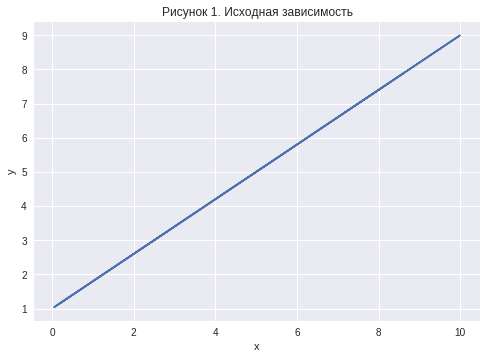

In [90]:
plt.plot(x,y)
plt.title("Рисунок 1. Исходная зависимость")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

2. Сгенерировать вектор погрешностей из N значений случайной величины, распределенной по нормальному закону с нулевым средним значением и СКО = 1.7

In [0]:
sigma = 1.7
mu = 0
noise = sigma * np.random.randn(N) + mu

3. Прибавить полученный вектор шума к коорждинате y

In [0]:
y_noised = y + noise

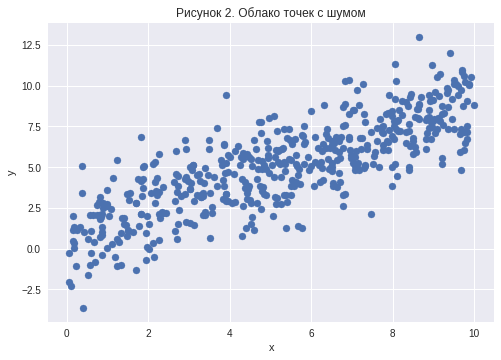

In [93]:
plt.scatter(x,y_noised)
plt.title("Рисунок 2. Облако точек с шумом")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. Построить уравнение регрессии по полученным зашумленным парам точек с использованием МНК и МГК. Сравнить с исходным уравнением.  

4. 1  МНК

In [0]:
def mnk_method(x, y):
  # Covariation matrix
  cov_matrix = np.cov(x,y)
  
  # Angle coefficient
  b_mnk = cov_matrix[0,1]/cov_matrix[0,0]
  
  # Free coefficient
  a_mnk = np.mean(y) - b_mnk*np.mean(x)
  
  # Approx. value
  y_mnk = a_mnk + b_mnk*x
  return y_mnk

In [0]:
y_mnk = mnk_method(x, y_noised)

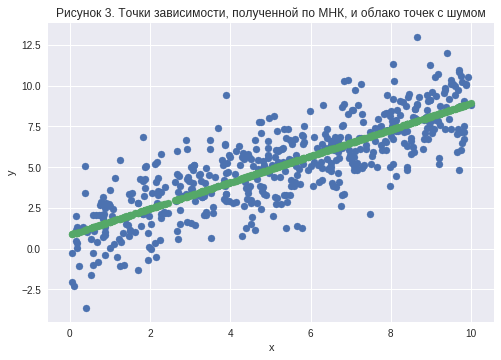

In [96]:
plt.scatter(x,y_noised)
plt.scatter(x,y_mnk)
plt.title("Рисунок 3. Точки зависимости, полученной по МНК, и облако точек с шумом")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4.2 МГК

In [0]:
def mgk_method(x,y):
  # Centered vector of input data
  x_centered = x - np.mean(x)
  y_centered = y - np.mean(y)
  
  # Covariation matrix
  cov_matrix_mgk = np.cov(x_centered,y_centered)
  
  # Find eigen vectors
  eigen_values, eigen_vectors = np.linalg.eig(cov_matrix_mgk)
  
  # Coefficients of regression curve
  b_mgk = eigen_vectors[1,0]/eigen_vectors[0,0]
  a_mgk = np.mean(y) - b*np.mean(x)
  y_mgk = a_mgk + b_mgk*x
  return y_mgk

In [0]:
y_mgk = mgk_method(x, y_noised)

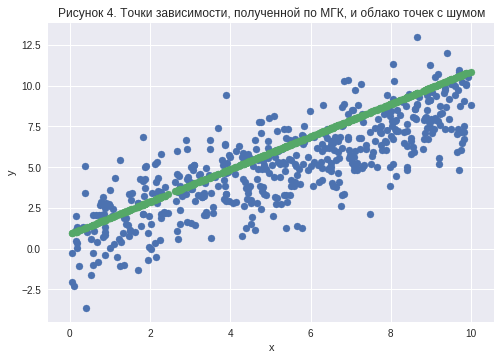

In [99]:
plt.scatter(x, y_noised)
plt.scatter(x, y_mgk)
plt.title("Рисунок 4. Точки зависимости, полученной по МГК, и облако точек с шумом")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4.3 Сравнение зависимостей 

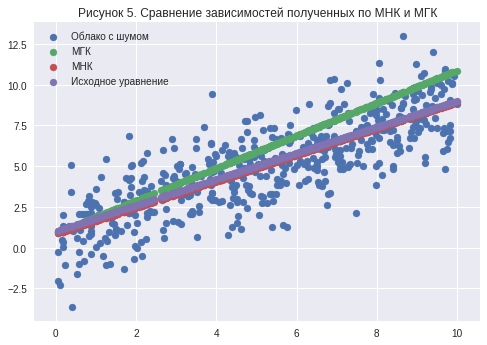

In [100]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x, y_noised, label='Облако с шумом')
ax.scatter(x, y_mgk, label='МГК')
ax.scatter(x, y_mnk, label='МНК')
ax.scatter(x, y, label='Исходное уравнение')
ax.set_title("Рисунок 5. Сравнение зависимостей полученных по МНК и МГК")
ax.legend()
plt.show()

5. Сгенерировать независимо два вектора погрешностей по N значений случайной величины, распределенной по нормальному закону с нулевым средним значением и СКО, равным 1,7. Прибавить их к координатам соответственно y и x исходных не зашумленных данных.

In [0]:
noise_y = sigma * np.random.randn(N) + mu
noise_x = sigma * np.random.randn(N) + mu

In [0]:
y_noised = y + noise_y
x_noised = x + noise_x

6. Построить уравнение регрессии по полученным зашумленным парам точек с использованием МНК и МГК. Сравнить с исходным уравнением.

In [0]:
y_mnk_2 = mnk_method(x_noised, y_noised)
y_mgk_2 = mgk_method(x_noised, y_noised)

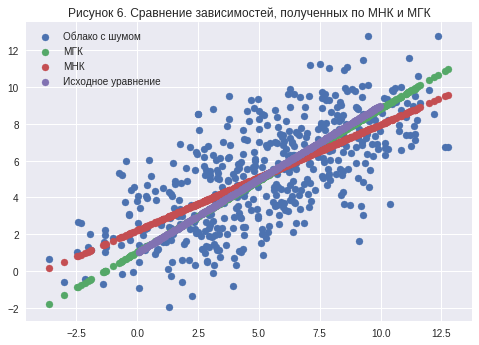

In [104]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x_noised, y_noised, label='Облако с шумом')
ax.scatter(x_noised, y_mgk_2, label='МГК')
ax.scatter(x_noised, y_mnk_2, label='МНК')
ax.scatter(x, y, label='Исходное уравнение')
ax.set_title("Рисунок 6. Сравнение зависимостей, полученных по МНК и МГК")
ax.legend()
plt.show()

7. Выводы.  
Уравнение регрессии, полученное методом наименьших квадратов, больше совпадает с исходной  зависимостью в случае зашумленности выходных данных (y_noised). В случае, когда шум накладывался и на входные, и на выходные данные (x_noised, y_noised), степень совпадения уравнений уменьшилась.   
Уравнение регрессии, полученное методом главных компонент, в меньшей степени совпадает с исходной зависимостью.

## Задание 2*. Снижение размерности данных методом главных компонент с использованием свойств сингулярного разложения матриц

1. Сгенерировать 3 реализации 10-мерного нормального распределения с нулевым вектором средних и единичными дисперсиями при условии равенства 0,2 всех парных коэффициентов корреляции

In [0]:
# Correlation matrix
cov_matrix = np.array([[1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2],
                       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1]])

mean_value = np.zeros((10,))

In [0]:
# Generate realization
data_matrix = np.random.multivariate_normal(mean_value, cov_matrix, size=3)

In [0]:
data_matrix

array([[-0.79399791,  0.14293334, -1.57575714, -1.37971509, -0.12723743,
        -1.08165957,  0.48348356, -0.62702851,  0.2700983 , -1.50931069],
       [-0.39516999,  1.01992491, -1.36125781, -0.07478458,  1.23778408,
        -1.83074555, -0.33983636, -0.29386224, -2.16384148,  0.09252108],
       [-1.31825783, -1.21771585,  0.4215153 , -1.62563712, -0.32854337,
        -0.88446782, -0.70837598, -1.00542608, -1.76239192,  0.86632316]])

2. Рассчитать собственные вектора и собственные числа, используя МГК, реализованный в библиотеке scikit-learn

In [0]:
pca = PCA(n_components = 2)
PCAreduced = pca.fit_transform((data_matrix))

Полученные реализации с уменьшенной размерностью с 10 до 2

In [0]:
PCAreduced

array([[-1.66282456, -1.59406073],
       [-0.71948384,  2.07885864],
       [ 2.38230841, -0.48479791]])

3. Использование свойств сингулярного разложения

In [0]:
data_matrix_centered = data_matrix - np.mean(data_matrix)

4. Построение ковариационной матрицы

In [0]:
cov_matrix = np.cov(data_matrix_centered.T)

5. Вычисление собственных векторов и собственных значений

In [0]:
evals, evecs = np.linalg.eigh(cov_matrix)

Собственные значения

In [0]:
evals

array([-8.02631242e-16, -1.42107369e-16, -5.58741674e-17, -1.83987782e-17,
        2.64856099e-17,  4.98088317e-17,  2.10703712e-16,  3.27389152e-16,
        3.54885594e+00,  4.47901794e+00])

Соответствующие им собственные вектора

In [0]:
evecs

array([[ 0.16278075, -0.17229689, -0.59339422,  0.20671926, -0.30177087,
         0.53891705, -0.27003485, -0.20459797,  0.152622  , -0.17145489],
       [-0.67635954, -0.19100163,  0.10848079, -0.0009224 , -0.09353193,
         0.20108232,  0.33245835,  0.15919068,  0.34980025, -0.43228977],
       [-0.54593491,  0.33088239, -0.23068439,  0.05228012,  0.04154034,
         0.06952666,  0.10890099, -0.49856355, -0.07359551,  0.51392852],
       [ 0.15617802,  0.59205529,  0.28480648, -0.41400269,  0.08501894,
         0.34089392, -0.17736476, -0.1717515 ,  0.39900022, -0.17020902],
       [ 0.14710069,  0.461738  , -0.32125987,  0.44548734, -0.02222711,
        -0.44543643,  0.23875121,  0.09966059,  0.41355292, -0.16317012],
       [ 0.26689448,  0.15346424,  0.10367572,  0.27430545,  0.17327721,
         0.55252049,  0.62339422,  0.16849726, -0.2328697 ,  0.1126058 ],
       [-0.03632029,  0.04842105,  0.53984113,  0.61565427, -0.14119989,
         0.00334876, -0.22466841, -0.4086787 

Собственные значения  8, 9 (нумерация с 0) значительно превышают остальные, поэтому выбираем собственные вектора, соотвествующие этим значениям

Получаем 3  реализации процесса с уменьшенной до 2n размерностью

In [0]:
np.dot(data_matrix_centered, evecs[8:10].T)

array([[ 0.0846532 , -1.12437518],
       [ 1.53322635, -0.34923941],
       [-0.27395574,  0.07015564]])

Значения, расчитанные с помощью свойств сингулярности разложения и библиотечной функции различаются

In [0]:
PCAreduced

array([[-1.66282456, -1.59406073],
       [-0.71948384,  2.07885864],
       [ 2.38230841, -0.48479791]])

## Задание 3. Построение разделяющей прямой методом ЛДА

1. Сгенерировать два набора данных (по 200 точек в каждом) как реализации двумерного нормального распределения. Первый набор данных: среднее значение равно [1; 3], СКО = [0,7; 0,8], коэффициент корреляции = 0,2. 

In [0]:
N = 200

cov_matrix_1 = np.array([[0.7**2, 0.2*0.7*0.8],
                         [0.2*0.7*0.8, 0.8**2]])

mean_value_1 = np.array([1, 3])

data_matrix_1 = np.random.multivariate_normal(mean_value_1, cov_matrix_1, size=N)

Второй набор данных: среднее значение равно [3;2], СКО = [0,3; 1,8], коэффициент корреляции = 0,7 

In [0]:
cov_matrix_2 = np.array([[0.3**2, 0.7*0.3*1.8],
                         [0.7*0.3*1.8, 1.8**2]])

mean_value_2 = np.array([3, 2])

data_matrix_2 = np.random.multivariate_normal(mean_value_2, cov_matrix_2, size=N)

2. Выполнить проекцию на одно направление методом ЛДА

Построение вектора внутриклассового различия

In [0]:
Sw1 = (N -1)*np.cov(data_matrix_1.T)
Sw2 = (N -1)*np.cov(data_matrix_2.T)
Sw = Sw1 + Sw2

Построение вектора перехода

In [0]:
W = np.dot(np.linalg.inv(Sw),(mean_value_1 - mean_value_2).T)

In [0]:
Y1 = W.T*data_matrix_1
Y2 = W.T*data_matrix_2

In [0]:
b = W[1]/W[0]

In [0]:
X = np.append(data_matrix_1[:,0], data_matrix_2[:,0])
Y = np.append(data_matrix_1[:,1], data_matrix_2[:,1])

In [0]:
a = np.mean(Y) - b*np.mean(X)

In [0]:
y1 = a+b*data_matrix_1[:,0]
y2 = a+b*data_matrix_2[:,0]


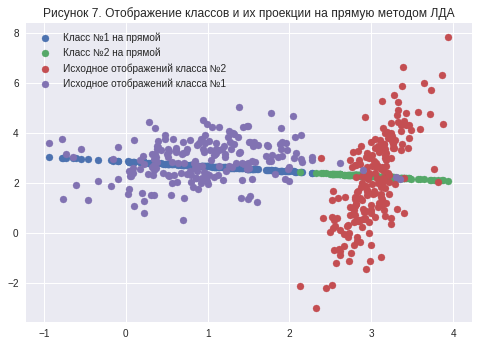

In [74]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(data_matrix_1[:,0],y1, label='Класс №1 на прямой')
ax.scatter(data_matrix_2[:,0],y2, label='Класс №2 на прямой')
ax.scatter(data_matrix_2[:,0], data_matrix_2[:,1], label='Исходное отображений класса №2')
ax.scatter(data_matrix_1[:,0], data_matrix_1[:,1], label='Исходное отображений класса №1')
ax.set_title("Рисунок 7. Отображение классов и их проекции на прямую методом ЛДА")
ax.legend()
plt.show()

Построение гистграммы значений полученного признака для обоих классов

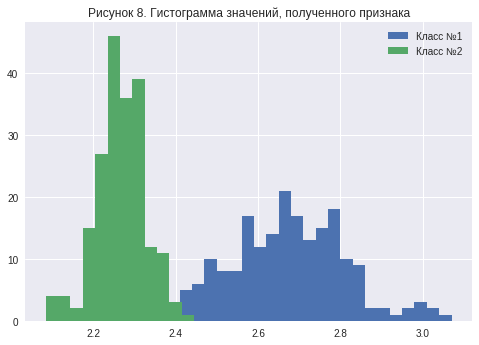

In [85]:
binwidth = 0.03
fig = plt.figure()
ax = plt.subplot(111)
ax.hist(y1, bins=np.arange(min(y1), max(y1) + binwidth, binwidth), label='Класс №1')
ax.hist(y2, bins=np.arange(min(y2), max(y2) + binwidth, binwidth), label='Класс №2')
ax.set_title("Рисунок 8. Гистограмма значений, полученного признака")
ax.legend()
plt.show()